<img src="anime.jpeg">

# Problem statement
#### Every streaming content has its own viewers and each content has it's rating. Viewers leave some good ratings for the content if they like it. But where does it apply? Viewers can spend hours scrolling through hundreds, sometimes thousands of anime's  never finding an content they like. Business need to be provided suggestions based on their likes and needs in order to create a better streaming environment that boosts revenue and increases the time spent on a website.

<img src="https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2018/09/WD_2.jpg">

###  It is an unsupervised machine learning algorithm one that does not have a target variable to measure accuracy against mostly used to aid in consumer decision making. You have seen them while online shopping or on streaming apps like netflix to help you select a TV show or movie to watch next.Many e-retailers like Amazon have already been using recommender algorithms for quite some time.


## About Dataset
#### This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings. 



## Project summary

## Objectives of the project

1. Gathering Data
2. Analyze the data
3. Preprocessing
4. Recommendation building phase 



### Import Libraries
#### Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [5]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot') # for styling
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8 # to plot figure in atleast size

# for ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Gathering Data

In [6]:
anime_data=pd.read_csv('/home/amninder/Documents/project/wtwn-anime/archive/anime.csv')
rating_data=pd.read_csv('/home/amninder/Documents/project/wtwn-anime/archive/rating.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [7]:
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## Dataset Details

### 1)anime_data:

* **anime_id** - myanimelist.net's unique id identifying an anime.
* **name** - full name of anime.
* **genre** - comma separated list of genres for this anime.
* **type** - movie, TV, OVA, etc.
* **episodes** - how many episodes in this show. (1 if movie).
* **rating** - average rating out of 10 for this anime.
* **members** - number of community members that are in this anime's "group".

### 2)rating_data:

* **user_id** - non identifiable randomly generated user id.
* **anime_id** - the anime that this user has rated.
* **rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

## Merging dataframes - Fusion

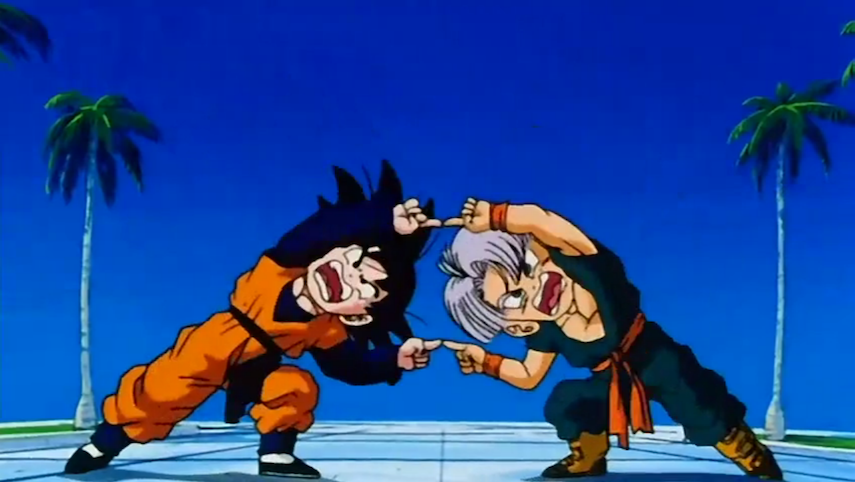


#### In this section we are fusing our csv to make the recomenndation engine more powerful.


In [8]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user']) # anime_id name genre type episodes rating members user_id rating_user
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'}) # anime_id  anime_title  genre  type  episodes  rating  members  user_id  user_rating
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Analyze the data

## 1. Top 10 Anime based on rating counts
#### The top anime's based on their rating counts provided by the user id's. Let's see who tops the throne

In [10]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title']) #drop null values from anime title 
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})[['anime_title', 'user_rating']]
     )

Text(0, 0.5, 'User Rating count')

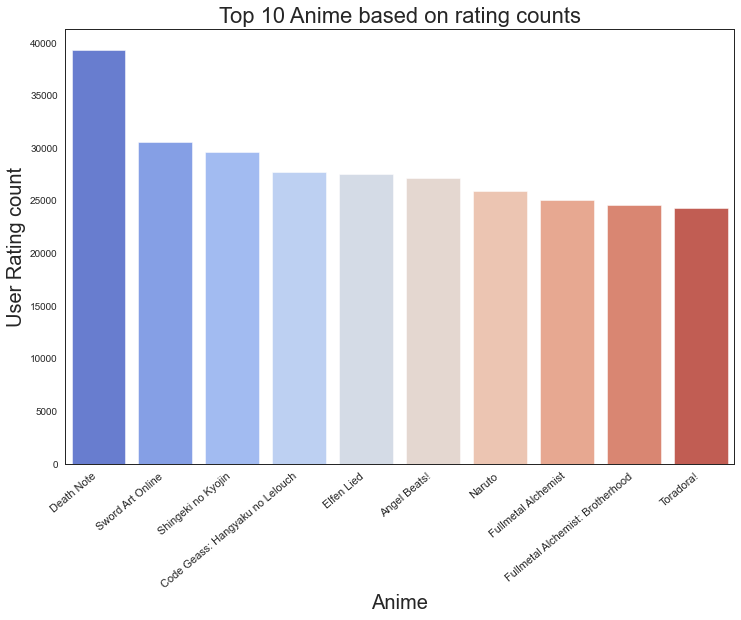

In [11]:
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10) 
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="coolwarm")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

**Results:** <br>
* Death Note wears the crown for rating count followed by sword art online and Attack on Titan

In [12]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

## 2. Top 10 Anime based on member count
#### The top anime's based on their community size.

In [13]:
duplicate_anime=anime_fulldata.copy()  #creating copy of animedata to drop duplicates(if any)
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)

Text(0, 0.5, 'Community Size')

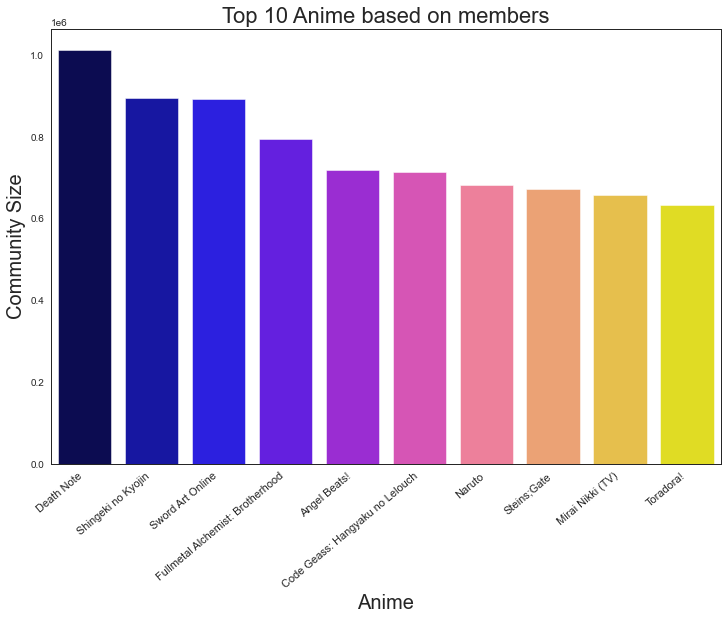

In [14]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

## 3. Distribution of ratings
#### The distribution of ratings on both the datasets are as follows 
* The rating from *anime.csv* is from review websites 
* The *user_rating* in rating.csv is from user id's

Text(0.5, 1.0, 'Rating of users')

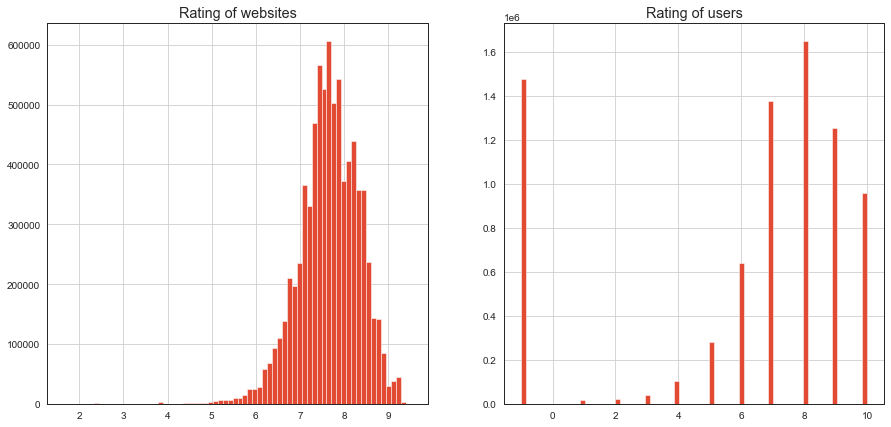

In [15]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

**Insights:**
* Most of the ratings are spread between 6-10
* The mode of the distribution is around 7.5-8.0
* Both the distribution are left skewed
* We have -1 rating as an outlier in rating of users which can be made into NaN

## 4. Medium of streaming 


In [17]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

**Insights:**
* 67.6% of the anime's were aired on TV followed by 13.5% through Movie
* 10.2% of anime's are streamed as OVA which is greater than ONA(1.18%)

## 5. Genre Word Cloud


CPU times: user 11.3 s, sys: 384 ms, total: 11.7 s
Wall time: 11.7 s


(-0.5, 799.5, 399.5, -0.5)

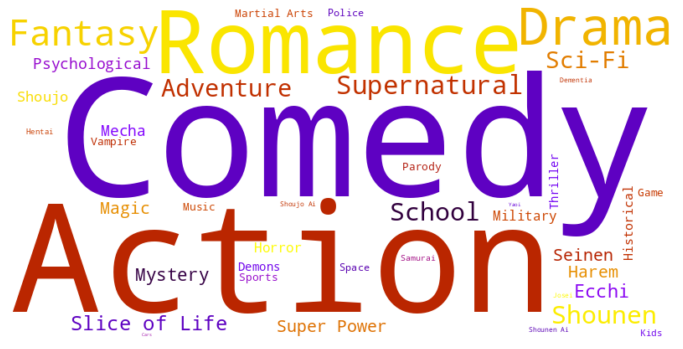

In [20]:
%%time
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud
# print(all_genres)
genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

**Insights:**
* There are many Comedy genre anime's followd by action, romance,drama in our dataset


# Preprocessing

#### Before giving our dataset to the recommendation engine we have to fine tune them, sculpt them,train them to face the boss !


## 1. Handling NaN values

### First we have to take care of the NaN values, as this revolves around ratings, a user who hasn't given any ratings has added no value to the engine. So let's drop those NaN values

In [22]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


In [24]:
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

## 2. Filtering user_id

### Let's check the counts of user id and filter based on it

In [26]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
4507        1
67112       1
51639       1
50718       1
30683       1
Name: user_id, Length: 69600, dtype: int64

In [28]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)] 
anime_feature

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0,2199
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0,2199
14,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,784,9.0,2199
...,...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1.0,4
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4.0,4
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1.0,4
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6.0,3


#### counts is a pd.Series object. counts > 200 returns a Boolean series. We filter the counts series by the Boolean counts > 200 series (that's what the square brackets achieve). We then take the index of the resultant series to find the rating with > 200 counts. 
#### There are users who has rated only once, even if they have rated it 5, it can't be considered a valuable record for recommendation. So I have considered minimum 200 ratings by the user as threshold value. You can play around changing the threshold value to get better results, but this worked fine.

## 3. Pivot Table (pivot tables as essentially a multidimensional version of GroupBy aggregation)

### This pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity

In [30]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,2300,...,70832,70838,70839,70842,70844,70879,70881,70884,70888,70931,70938,70953,70961,70998,71008,71016,71021,71029,71078,71115,71118,71122,71178,71184,71198,71212,71224,71225,71226,71231,71250,71252,71253,71278,71284,71300,71302,71330,71339,71362,71363,71377,71429,71435,71438,71453,71456,71466,71491,71498,71508,71529,71537,71564,71573,71607,71610,71619,71632,71655,71673,71699,71731,71739,71749,71754,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71821,71822,71844,71850,71854,71862,71877,71882,71893,71896,71898,71901,71908,71932,71942,71943,71945,71947,71951,71968,71971,71973,71974,71977,71984,71999,72007,72021,72035,72042,72043,72049,72052,72059,72060,72095,72107,72115,72126,72130,72196,72254,72263,72264,72268,72294,72305,72306,72317,72329,72400,72404,72409,72468,72511,72512,72516,72520,72526,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72677,72685,72694,72715,72759,72760,72767,72776,72786,72787,72789,72800,72811,72814,72817,72846,72857,72872,72875,72884,72889,72928,72941,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73031,73058,73070,73073,73075,73086,73088,73099,73101,73111,73114,73123,73132,73135,73152,73153,73155,73159,73160,73162,73177,73179,73188,73193,73197,73203,73212,73216,73221,73234,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73301,73317,73320,73328,73329,73340,73341,73343,73346,73356,73359,73362,73378,73379,73380,73389,73395,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


# Recommendation building phase 

## Collaborative Filtering

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Collaborative_filtering.gif/300px-Collaborative_filtering.gif">

#### Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

### Cosine Similarity using KNN


<img src="https://dataconomy.com/wp-content/uploads/2015/04/Five-most-popular-similarity-measures-implementation-in-python-4-620x475.png">


#### Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [33]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### We have fitted the sparse matrix, let's get a random anime title and find recommendation for it. 

In [34]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
query_index = 1735
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


5374


In [35]:
print(distances)

[[0.         0.2341309  0.33518    0.35072396 0.35916326 0.38489898]]


#### Here we are returning the distances and indices of 6 neighbours through KNN from the randomly chosen index(anime_title) those will be our recommended anime's

In [36]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Detective Conan OVA 12: The Miracle of Excalibur:

1: Detective Conan OVA 11: A Secret Order from London, with distance of 0.2341309017299078:
2: Detective Conan OVA 10: Kid in Trap Island, with distance of 0.3351800038443903:
3: Detective Conan OVA 08: High School Girl Detective Sonoko Suzuki&#039;s Case Files, with distance of 0.3507239620100743:
4: Detective Conan OVA 07: A Challenge from Agasa! Agasa vs. Conan and the Detective Boys, with distance of 0.35916326267209986:
5: Detective Conan Bonus File: Fantasista Flower, with distance of 0.3848989777289161:


In [37]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Detective Conan OVA 12: The Miracle of Excalibur:

1: Detective Conan OVA 11: A Secret Order from London, with distance of 0.2341309017299078:
2: Detective Conan OVA 10: Kid in Trap Island, with distance of 0.3351800038443903:
3: Detective Conan OVA 08: High School Girl Detective Sonoko Suzuki&#039;s Case Files, with distance of 0.3507239620100743:
4: Detective Conan OVA 07: A Challenge from Agasa! Agasa vs. Conan and the Detective Boys, with distance of 0.35916326267209986:
5: Detective Conan Bonus File: Fantasista Flower, with distance of 0.3848989777289161:


## Content based filtering

<img src="https://miro.medium.com/max/4056/1*yrkvweErbifbPFkBUyZlOw.png">


#### Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document.A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

### a) Cleaning anime_title

#### We got many symbols found in anime_title. Let's remove those using this function

In [38]:
#Sharingan copy:https://www.kaggle.com/indralin/try-content-based-and-collaborative-filtering
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    text = re.sub(r';', ' ', text)
    text = re.sub(r'°', ' ', text) 
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

#### We have got the title cleaned and neat. Now it's time for the ultimate TFIDF to recommend us the next anime

### b) Term Frequency (TF) and Inverse Document Frequency (IDF)

<img src="https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png">


#### TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

#### Here we are gonna use it on the genre so that we can recommend the users based on genre content.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [40]:
tfv_matrix.shape

(12294, 1554)

#### Scikit-learn already provides pairwise metrics (a.k.a. kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. Here we need to assign 1 for recommended anime and 0 for not recommended anime. So we are using sigmoid kernel

In [41]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [42]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()
indices

name
Kimi no Na wa.                                            0
Fullmetal Alchemist: Brotherhood                          1
Gintama                                                   2
Steins Gate                                               3
Gintama                                                   4
                                                      ...  
Toushindai My Lover: Minami tai Mecha-Minami          12289
Under World                                           12290
Violence Gekiga David no Hoshi                        12291
Violence Gekiga Shin David no Hoshi: Inma Densetsu    12292
Yasuji no Pornorama: Yacchimae!!                      12293
Length: 12294, dtype: int64

#### We have got the indices for the anime_title, now let's jump onto figure out the recommended anime

### c) Recommendation function

#### Here we create the function for getting the recommendation for an anime. We turn the similarity scores into lists using enumerate function, sort the list and select the top 10 score for recommendation. 

In [43]:
def model(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

#### Let's bring the battle of recommendation !

In [44]:
import pickle

In [45]:
file = "mymodel.pkl"
fileobj = open(file,'wb')
pickle.dump(model,fileobj)
fileobj.close()

In [46]:
file = "mymodel.pkl"
fileobj = open(file,'rb')
mp = pickle.load(fileobj)
print(mp('Naruto: Shippuuden'))

                                          Anime name  Rating
0                                 Naruto: Shippuuden    7.94
1                                             Naruto    7.81
2  Boruto: Naruto the Movie - Naruto ga Hokage ni...    7.68
3                                        Naruto x UT    7.58
4        Naruto: Shippuuden Movie 4 - The Lost Tower    7.53
5  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...    7.50
6               Naruto Shippuuden: Sunny Side Battle    7.26
7  Naruto Soyokazeden Movie: Naruto to Mashin to ...    7.11
8                      Battle Spirits: Ryuuko no Ken    4.89
9                            Kyutai Panic Adventure!    5.21


In [47]:
model('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [48]:
model('Steins Gate')

,Anime name,Rating
0,Steins Gate Movie: Fuka Ryouiki no Déjà vu,8.61
1,Steins Gate: Oukoubakko no Poriomania,8.46
2,Steins Gate: Kyoukaimenjou no Missing Link - D...,8.34
3,Steins Gate 0,NaN
4,Under the Dog,6.55
5,Loups=Garous,6.43
6,Loups=Garous Pilot,5.87
7,Ibara no Ou,7.24
8,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44
9,Higashi no Eden,8.03


In [49]:
model('One Piece')

,Anime name,Rating
0,One Piece: Episode of Merry - Mou Hitori no Na...,8.29
1,One Piece: Episode of Nami - Koukaishi no Nami...,8.27
2,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.78
3,One Piece Film: Strong World,8.42
4,One Piece Film: Z,8.39
5,One Piece Film: Gold,8.32
6,One Piece: Heart of Gold,7.75
7,Digimon Frontier,7.25
8,Digimon Tamers,7.65
9,Digimon Savers,7.10


In [50]:
model('Dragon Ball Z')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62


# ------------
